## Bernoulli

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

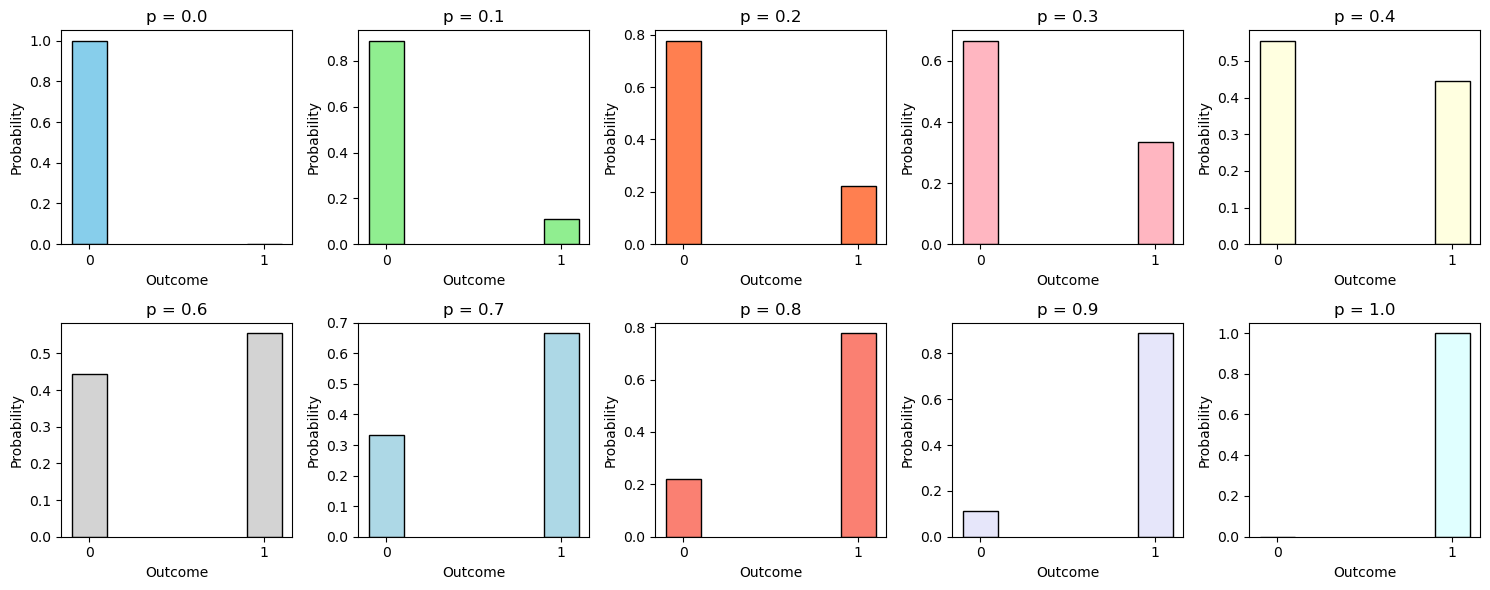

In [8]:
# Create a list of colors for the bars
colors = ['skyblue', 'lightgreen', 'coral', 'lightpink', 'lightyellow', 'lightgray', 'lightblue', 'salmon', 'lavender', 'lightcyan']

# Set up a 2x5 grid for subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Loop over p values and plot each distribution in a different subplot
for i, p in enumerate(np.linspace(0, 1, 10)):
    # Define the Bernoulli distribution
    bern = bernoulli(p)

    # Plot the PMF of the Bernoulli distribution
    x = [0, 1]
    pmf = bern.pmf(x)

    # Select the current subplot
    ax = axes[i // 5, i % 5]

    # Create the bar plot with a unique color
    ax.bar(x, pmf, width=0.2, color=colors[i], edgecolor='black')

    # Set labels and title for each subplot
    ax.set_xticks([0, 1])
    ax.set_xlabel('Outcome')
    ax.set_ylabel('Probability')
    ax.set_title(f'p = {p:.1f}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Binomial

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from math import comb


In [28]:
# Define function to calculate the binomial PMF
def binomial_pmf(n, k, p):
    # Calculate the binomial coefficient (n choose k)
    binom_coeff = comb(n, k)
    # Calculate the probability for exactly k successes
    return binom_coeff * (p ** k) * ((1 - p) ** (n - k))

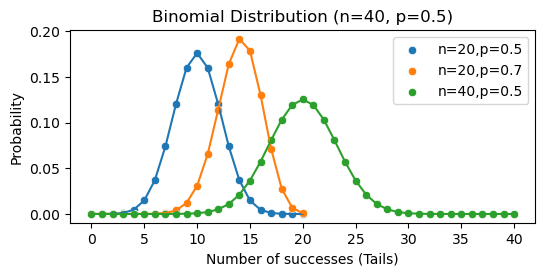

In [25]:
# Parameters for the binomial distribution
n = 20  # number of trials (e.g., 5 coin flips)
p = 0.2  # probability of success (e.g., getting tails)

plt.figure(figsize=(6,2.5))
for n,p, clr in [(20,0.5,sns.color_palette()[0]), (20,0.7,sns.color_palette()[1]) , (40,0.5,sns.color_palette()[2])]:

    # Generate the number of successes (0 through n)
    x = np.arange(0, n+1)

    # Calculate the binomial probability mass function (PMF) for each possible number of successes
    pmf = binom.pmf(x, n, p)

    # Plot the binomial distribution
    sns.scatterplot(x=x, y=pmf, color=clr,label=f'n={n},p={p}')
    sns.lineplot(x=x, y=pmf, color=clr)

    plt.xlabel('Number of successes (Tails)')
    plt.ylabel('Probability')
    plt.title(f'Binomial Distribution (n={n}, p={p})')

    # Display the plot
plt.show()

In [43]:
for n,p, clr in [(20,0.5,sns.color_palette()[0]), (20,0.7,sns.color_palette()[1]) , (40,0.5,sns.color_palette()[2])]:
    x = np.arange(0, n+1)
    print(n,p, np.all(np.isclose(binom.pmf(x, n, p) , [binomial_pmf(n, k, p) for k in x])))

20 0.5 True
20 0.7 True
40 0.5 True


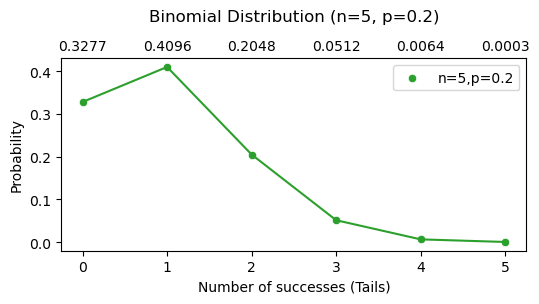

In [111]:
n = 5  # number of trials (e.g., 5 coin flips)
p = 0.2  # probability of success (e.g., getting tails)

plt.figure(figsize=(6,2.5))

# Generate the number of successes (0 through n)
x = np.arange(0, n+1)

# Calculate the binomial probability mass function (PMF) for each possible number of successes
pmf = binom.pmf(x, n, p)

# Plot the binomial distribution
sns.scatterplot(x=x, y=pmf, color=clr,label=f'n={n},p={p}')
sns.lineplot(x=x, y=pmf, color=clr)

for i in range(len(x)):
    plt.text(x[i], .45, f'{pmf[i]:.4f}', ha='center', color='black')


plt.xlabel('Number of successes (Tails)')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n={n}, p={p})',y=1.15)

# Display the plot
plt.show()

In [75]:
from collections import Counter
import pandas as pd

In [141]:
choices = ['H','H','H','H',"T"]

all_trials = pd.DataFrame([Counter(np.random.choice(choices, 5)) for i in range(1 000 000)])
all_trials = all_trials.fillna(0)

empirical_probabilities = {p:(all_trials['T'] == p).sum()/len(all_trials) for p in range(6)}
empirical_probabilities


{0: 0.328016, 1: 0.409615, 2: 0.204692, 3: 0.050894, 4: 0.006455, 5: 0.000328}

In [135]:
n = 5  # number of trials (coin flips)
p = 0.2  # probability of success (getting Tails)

# Theoretical binomial PMF
theoretical_probabilities = dict(enumerate(pmf))
theoretical_probabilities

{0: 0.3276799999999998,
 1: 0.4095999999999999,
 2: 0.20479999999999987,
 3: 0.051200000000000016,
 4: 0.0064,
 5: 0.0003200000000000001}

In [146]:
# After 1M random draws
{k:np.round(v,3) for k,v in empirical_probabilities.items()},\
{k:np.round(v,3) for k,v in theoretical_probabilities.items()}

({0: 0.328, 1: 0.41, 2: 0.205, 3: 0.051, 4: 0.006, 5: 0.0},
 {0: 0.328, 1: 0.41, 2: 0.205, 3: 0.051, 4: 0.006, 5: 0.0})

## Poisson distribution

In [2]:
from scipy.stats import poisson

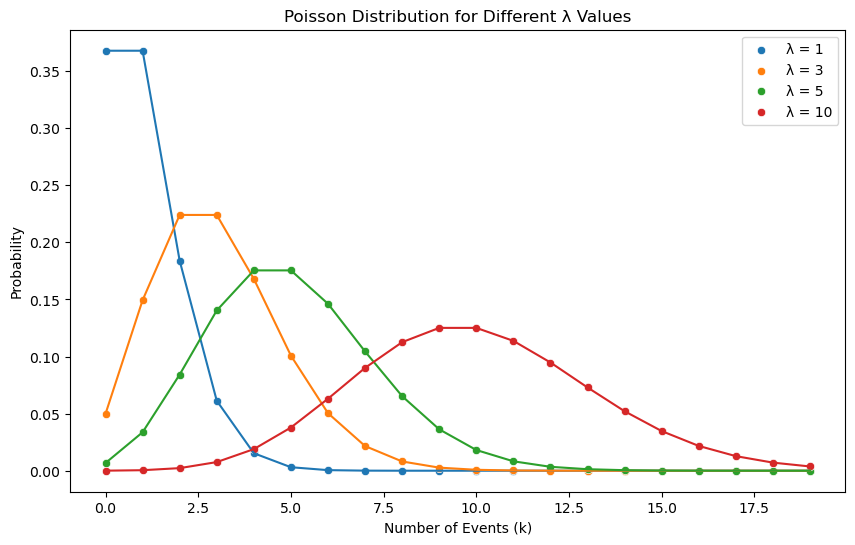

In [150]:
# Define a range of k values (number of events)
k = np.arange(0, 20)

# Define different lambda values to see how the distribution changes
lambdas = [(1,sns.color_palette()[0]),
           (3,sns.color_palette()[1]),
           (5,sns.color_palette()[2]),
           (10,sns.color_palette()[3])
           ]

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot Poisson distributions for different lambda values
for lam,clr  in lambdas:
    pmf = poisson.pmf(k, lam)
    
    sns.scatterplot(x=k, y=pmf, color=clr,label=f'λ = {lam}')
    sns.lineplot(x=k, y=pmf, color=clr)


# Add labels and title
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.title('Poisson Distribution for Different λ Values')
plt.legend()

# Display the plot
plt.show()

In [151]:
import math

# Define a function to calculate the Poisson PMF manually
def poisson_pmf(lam, k):
    return (lam ** k) * np.exp(-lam) / math.factorial(k)


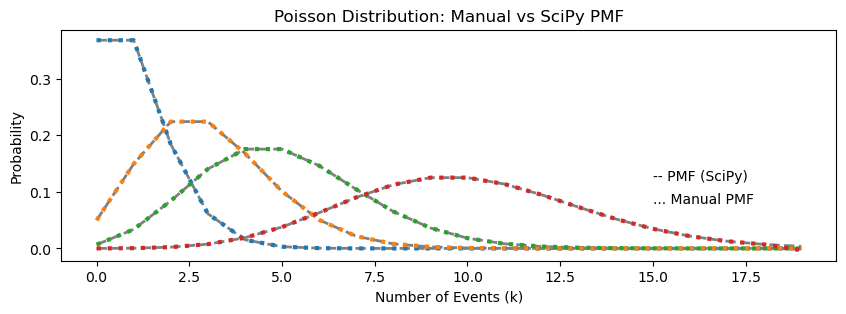

In [189]:
# Define a range of k values (number of events)
k = np.arange(0, 20)


lambdas = [(1,sns.color_palette()[0]),
           (3,sns.color_palette()[1]),
           (5,sns.color_palette()[2]),
           (10,sns.color_palette()[3])
           ]

# Set up the plot
plt.figure(figsize=(10, 3))

# Plot Poisson distributions for different lambda values
for lam,clr  in lambdas:
    
    pmf = poisson.pmf(k, lam)
    pmf_manual = [poisson_pmf(lam, i) for i in k]
    
    #sns.scatterplot(x=k, y=pmf_manual, color=clr,label=f'λ = {lam}')
    sns.lineplot(x=k, y=pmf_manual, color=clr,ls='dotted',lw=3)
    sns.lineplot(x=k, y=pmf, color='gray',ls='--',zorder=1,lw=2)

plt.text(15, 0.12, '-- PMF (SciPy)', color='black', fontsize=10)
plt.text(15, 0.08, '... Manual PMF', color='black', fontsize=10)

plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.title('Poisson Distribution: Manual vs SciPy PMF')

# Display the plot
plt.show()

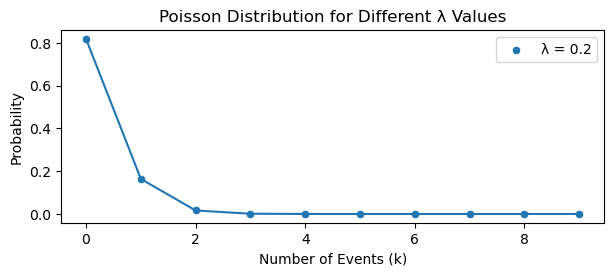

In [209]:
# Define a range of k values (number of events)
k = np.arange(0, 10)

# Set up the plot
plt.figure(figsize=(7, 2.5))

# Plot Poisson distributions for different lambda values
lam  = 1/5
clr  = sns.color_palette()[0]

pmf = poisson.pmf(k, lam)    
sns.scatterplot(x=k, y=pmf, color=clr,label=f'λ = {lam}')
sns.lineplot(x=k, y=pmf, color=clr)


# Add labels and title
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.title('Poisson Distribution for Different λ Values')
plt.legend()

# Display the plot
plt.show()

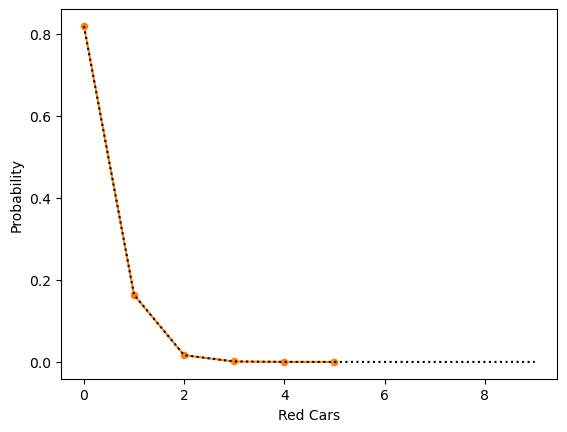

In [215]:
# Step 1: Define the rate (λ) for red cars (e.g., 1 red car every 5 minutes)
lambda_red_cars = 1 / 5  # λ = 1 car every 5 minutes

# Step 2: Simulate a toy example for 1 million trials
# Each trial represents counting cars over a 10-minute period
time_period = 1  # Let's observe for 10 minutes

# Simulate Poisson-distributed events for red cars
simulated_red_cars = poisson.rvs(lambda_red_cars * time_period, size=1000000)

# Step 3: Convert results to a DataFrame
all_trials = pd.DataFrame(Counter(simulated_red_cars).items(), columns=['Red Cars', 'Count'])
all_trials['Probability'] = all_trials['Count'] / all_trials['Count'].sum()
all_trials = all_trials.sort_values('Red Cars').reset_index(drop=True)
all_trials

sns.scatterplot(data=all_trials,color=sns.color_palette()[1], x='Red Cars',y='Probability')
sns.lineplot(data=all_trials,x='Red Cars',y='Probability',color=sns.color_palette()[1])


k = np.arange(0, 10)
pmf = poisson.pmf(k, lam)    
sns.lineplot(x=k, y=pmf, color='black',ls='dotted',)


plt.show()

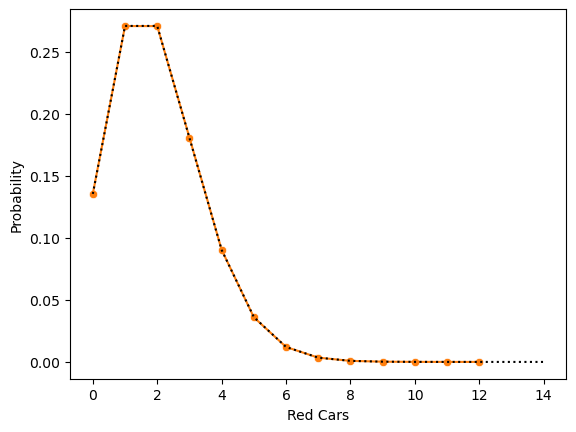

In [218]:
# Step 1: Define the rate (λ) for red cars (e.g., 1 red car every 5 minutes)
lambda_red_cars = 1 / 5  # λ = 1 car every 5 minutes

# Step 2: Simulate a toy example for 1 million trials
# Each trial represents counting cars over a 10-minute period
time_period = 10  # Let's observe for 10 minutes

# Simulate Poisson-distributed events for red cars
simulated_red_cars = poisson.rvs(lambda_red_cars * time_period, size=1000000)

# Step 3: Convert results to a DataFrame
all_trials = pd.DataFrame(Counter(simulated_red_cars).items(), columns=['Red Cars', 'Count'])
all_trials['Probability'] = all_trials['Count'] / all_trials['Count'].sum()
all_trials = all_trials.sort_values('Red Cars').reset_index(drop=True)
all_trials

sns.scatterplot(data=all_trials,color=sns.color_palette()[1], x='Red Cars',y='Probability')
sns.lineplot(data=all_trials,x='Red Cars',y='Probability',color=sns.color_palette()[1])


k = np.arange(0, 15)
pmf = poisson.pmf(k, lam * time_period)    
sns.lineplot(x=k, y=pmf, color='black',ls='dotted',)


plt.show()

In [9]:
import pandas as pd
from collections import Counter

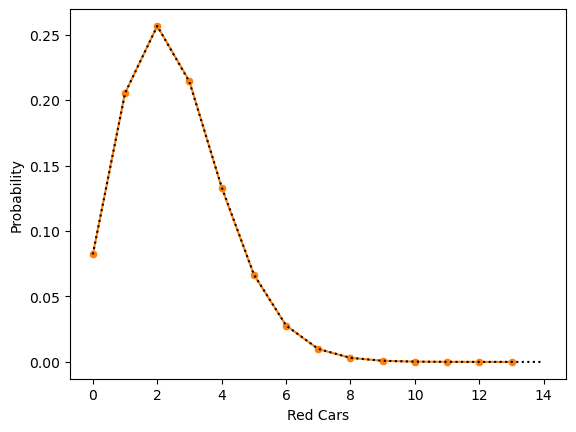

In [11]:
# Step 1: Define the rate (λ) for red cars (e.g., 1 red car every 5 minutes)
lambda_red_cars = 2.5  # λ = 1 car every 5 minutes

# Step 2: Simulate a toy example for 1 million trials
# Each trial represents counting cars over a 10-minute period
time_period = 1  # Let's observe for 10 minutes

# Simulate Poisson-distributed events for red cars
simulated_red_cars = poisson.rvs(lambda_red_cars * time_period, size=1000000)

# Step 3: Convert results to a DataFrame
all_trials = pd.DataFrame(Counter(simulated_red_cars).items(), columns=['Red Cars', 'Count'])
all_trials['Probability'] = all_trials['Count'] / all_trials['Count'].sum()
all_trials = all_trials.sort_values('Red Cars').reset_index(drop=True)
all_trials

sns.scatterplot(data=all_trials,color=sns.color_palette()[1], x='Red Cars',y='Probability')
sns.lineplot(data=all_trials,x='Red Cars',y='Probability',color=sns.color_palette()[1])


k = np.arange(0, 15)
pmf = poisson.pmf(k, lambda_red_cars * time_period)    
sns.lineplot(x=k, y=pmf, color='black',ls='dotted',)


plt.show()

In [226]:
# Define the manual approach to simulate Poisson-distributed random variables
def manual_poisson_rvs(lam, size=100):
    poisson_samples = []
    
    for _ in range(size):
        # Generate one Poisson random variable
        k = 0
        L = np.exp(-lam)  # Calculate the threshold using exp(-lambda)
        p = 1.0  # Initialize the product of uniform random variables
        
        while p > L:
            k += 1
            u = np.random.uniform()  # Generate a uniform random variable
            p *= u  # Update product of uniforms
        
        poisson_samples.append(k - 1)  # Store the result (k-1 events occurred)
    
    return poisson_samples

# Parameters
lambda_red_cars = 1 / 5  # λ = 1 car every 5 minutes
time_period = 10  # Observation period of 10 minutes
lambda_scaled = lambda_red_cars * time_period  # Scaled λ for 10 minutes

# Generate 100 Poisson-distributed random variables manually
manual_poisson = manual_poisson_rvs(lambda_scaled, size=100)

# Print the generated random variables
print(manual_poisson)

[4, 2, 4, 4, 4, 4, 3, 3, 1, 2, 1, 6, 0, 2, 1, 3, 1, 2, 2, 3, 2, 2, 3, 3, 0, 0, 3, 3, 2, 1, 2, 1, 1, 3, 0, 4, 1, 0, 0, 3, 2, 1, 0, 0, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 0, 5, 1, 1, 2, 4, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 3, 4, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 4, 1, 4]


In [237]:
size = 100
_lambda = 1/5 
time_period = 10

lam = _lambda * time_period

poisson_samples = []

for _ in range(size):
    # Generate one Poisson random variable
    k = 0
    L = np.exp(-lam)  # Calculate the threshold using exp(-lambda)
    p = 1.0  # Initialize the product of uniform random variables
    
    while p > L:
        k += 1
        u = np.random.uniform()  # Generate a uniform random variable
        p *= u  # Update product of uniforms
    
    poisson_samples.append(k - 1)  # Store the result (k-1 events occurred)

poisson_samples[:5]

[1, 0, 3, 2, 3]

In [250]:

p = 1
for i in range(10):
    u = np.random.uniform()
    p *= u
    print(p)

0.9652025986466507
0.7328994640301992
0.44008963216649244
0.24918512445950752
0.20348790318132132
0.11515508585328037
0.01674065216522696
0.012259996240607278
0.004682384251032876
0.0031489000494000353


In [228]:
Counter(manual_poisson)

Counter({1: 36, 2: 23, 0: 15, 3: 14, 4: 10, 6: 1, 5: 1})

In [229]:
Counter(poisson.rvs(lambda_red_cars * time_period, size=100))

Counter({2: 25, 1: 23, 3: 17, 0: 14, 4: 12, 5: 9})

## Negative Binomial distribution

In [252]:
from scipy.stats import nbinom

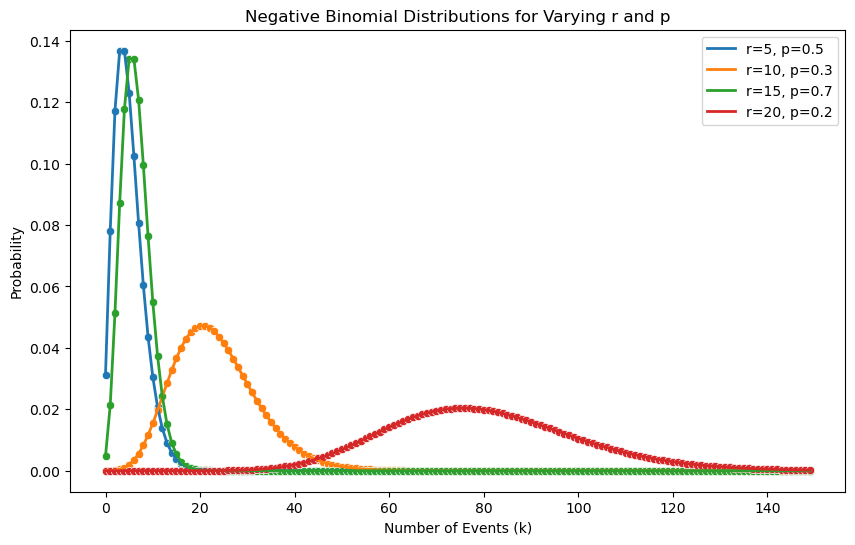

In [258]:
# Define a range of k values (number of events)
k = np.arange(0, 150)

# Define different (r, p) parameters to explore
nb_params = [
    (5, 0.5, sns.color_palette()[0]),
    (10, 0.3, sns.color_palette()[1]),
    (15, 0.7, sns.color_palette()[2]),
    (20, 0.2, sns.color_palette()[3])
]

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot Negative Binomial distributions for different (r, p) values
for r, p, clr in nb_params:
    
    # PMF using SciPy's nbinom for the Negative Binomial distribution
    pmf = nbinom.pmf(k, r, p)
    
    # Plot the distribution
    sns.scatterplot(x=k, y=pmf, color=clr, )
    sns.lineplot(x=k, y=pmf, color=clr, lw=2, label=f'r={r}, p={p}')

# Add labels and title
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.title('Negative Binomial Distributions for Varying r and p')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [260]:
from math import factorial


# Define a function to calculate the binomial coefficient
def binomial_coeff(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))

# Define the PMF for the Negative Binomial distribution manually
def negative_binomial_pmf(k, r, p):
    return binomial_coeff(k + r - 1, k) * (1 - p)**r * p**k

In [268]:
k = np.arange(0, 30)
r,p = 5, 0.5

pmf = nbinom.pmf(k, r, p)
pmf_manual = [negative_binomial_pmf(i, r, p) for i in k]
np.all(np.isclose(pmf, pmf_manual))   

True

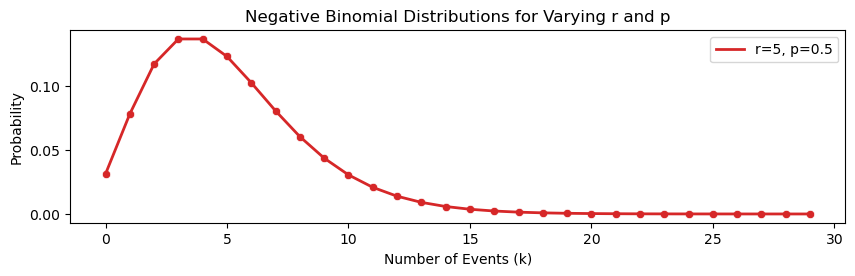

In [273]:
# Define a range of k values (number of events)
k = np.arange(0, 30)

# Define different (r, p) parameters to explore

r,p,color =   (5, 0.5, sns.color_palette()[0])
    
# Set up the plot
plt.figure(figsize=(10, 2.5))

# Plot Negative Binomial distributions for different (r, p) values


# PMF using SciPy's nbinom for the Negative Binomial distribution
pmf = nbinom.pmf(k, r, p)

# Plot the distribution
sns.scatterplot(x=k, y=pmf, color=clr, )
sns.lineplot(x=k, y=pmf, color=clr, lw=2, label=f'r={r}, p={p}')

# Add labels and title
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.title('Negative Binomial Distributions for Varying r and p')

# Display the legend
plt.legend()

# Show the plot
plt.show()

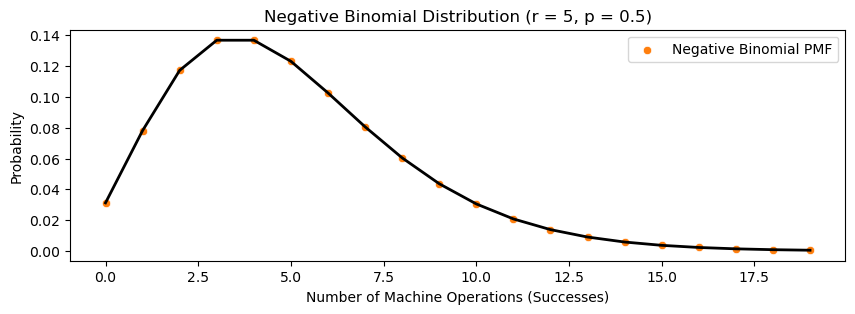

In [281]:
# Define the parameters for the Negative Binomial distribution
r = 5  # Number of failures (breakdowns) before stopping
p = 0.5  # Probability of success (the machine operates without breaking down)

# Define a range of k values (number of machine operations)
k = np.arange(0, 20)

# Simulate Negative Binomial-distributed events (operations before r breakdowns)
pmf = nbinom.pmf(k, r, p)

# Plot the distribution
plt.figure(figsize=(10, 3))
sns.scatterplot(x=k, y=pmf, color=sns.color_palette()[1], label='Negative Binomial PMF')
sns.lineplot(x=k, y=pmf, color='black', lw=2)

# Add labels and title
plt.xlabel('Number of Machine Operations (Successes)')
plt.ylabel('Probability')
plt.title(f'Negative Binomial Distribution (r = {r}, p = {p})')

# Display the plot
plt.legend()
plt.show()

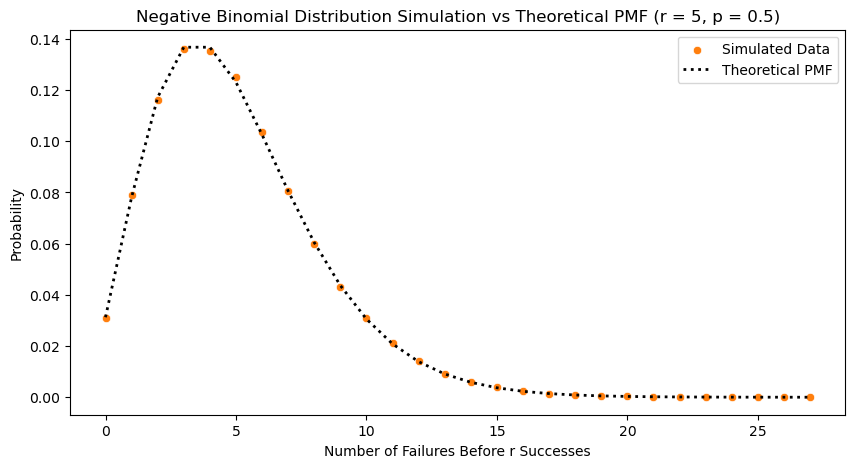

In [293]:
# Define the manual approach to simulate Negative Binomial-distributed random variables
def manual_negative_binomial_rvs(r, p, size=100000):
    neg_binom_samples = []
    
    for _ in range(size):
        successes = 0  # Start with 0 successes
        failures = 0  # Start with 0 failures
        
        # Simulate until we get r successes
        while successes < r:
            u = np.random.uniform()  # Generate a uniform random variable
            if u < p:  # Success occurs
                successes += 1
            else:  # Failure occurs
                failures += 1
        
        # Append the number of failures before r successes
        neg_binom_samples.append(failures)
    
    return neg_binom_samples

# Parameters
r = 5  # Number of successes
p = 0.5  # Probability of success on each trial
size = 100000  # Number of trials

# Step 1: Simulate Negative Binomial-distributed events (failures before r successes)
manual_neg_binom = manual_negative_binomial_rvs(r, p, size)

# Step 2: Convert results to a DataFrame for visualization
all_trials = pd.DataFrame(Counter(manual_neg_binom).items(), columns=['Failures', 'Count'])
all_trials['Probability'] = all_trials['Count'] / all_trials['Count'].sum()
all_trials = all_trials.sort_values('Failures').reset_index(drop=True)

# Step 3: Plot the simulated data (scatter plot)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=all_trials, x='Failures', y='Probability', color=sns.color_palette()[1], label='Simulated Data')

# Step 4: Plot the theoretical Negative Binomial PMF for comparison
k = np.arange(0, all_trials['Failures'].max() + 1)
pmf = nbinom.pmf(k, r, p)
sns.lineplot(x=k, y=pmf, color='black', ls='dotted', lw=2, label='Theoretical PMF')

# Add labels and title
plt.xlabel('Number of Failures Before r Successes')
plt.ylabel('Probability')
plt.title(f'Negative Binomial Distribution Simulation vs Theoretical PMF (r = {r}, p = {p})')
plt.legend()

# Show the plot
plt.show()

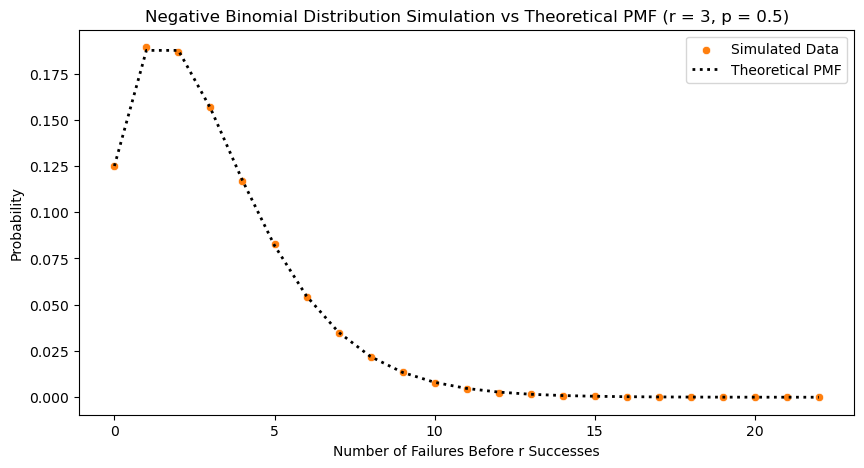

In [295]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Define the manual approach to simulate Negative Binomial-distributed random variables
def manual_negative_binomial_rvs(r, p, size=100000):
    neg_binom_samples = []
    
    for _ in range(size):
        successes = 0  # Start with 0 successes
        failures = 0  # Start with 0 failures
        
        # Simulate until we get r successes
        while successes < r:
            u = np.random.uniform()  # Generate a uniform random variable
            if u < p:  # Success occurs
                successes += 1
            else:  # Failure occurs
                failures += 1
        
        # Append the number of failures before r successes
        neg_binom_samples.append(failures)
    
    return neg_binom_samples

# Parameters
r = 3  # Number of successes
p = 0.5  # Probability of success on each trial
size = 100000  # Number of trials

# Step 1: Simulate Negative Binomial-distributed events (failures before r successes)
manual_neg_binom = manual_negative_binomial_rvs(r, p, size)

# Step 2: Convert results to a DataFrame for visualization
all_trials = pd.DataFrame(Counter(manual_neg_binom).items(), columns=['Failures', 'Count'])
all_trials['Probability'] = all_trials['Count'] / all_trials['Count'].sum()
all_trials = all_trials.sort_values('Failures').reset_index(drop=True)

# Step 3: Plot the simulated data (scatter plot)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=all_trials, x='Failures', y='Probability', color=sns.color_palette()[1], label='Simulated Data')

# Step 4: Plot the theoretical Negative Binomial PMF for comparison
k = np.arange(0, all_trials['Failures'].max() + 1)
pmf = nbinom.pmf(k, r, p)
sns.lineplot(x=k, y=pmf, color='black', ls='dotted', lw=2, label='Theoretical PMF')

# Add labels and title
plt.xlabel('Number of Failures Before r Successes')
plt.ylabel('Probability')
plt.title(f'Negative Binomial Distribution Simulation vs Theoretical PMF (r = {r}, p = {p})')
plt.legend()

# Show the plot
plt.show()
